# Creating the model

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        
        # Input layer (4 features) -> h1 N -> h2 N -> output (3 classes)
        
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x        

In [5]:
torch.manual_seed(32)
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df.shape

(150, 5)

In [14]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 33)

In [18]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

# Training the model

In [24]:
epochs = 100
losses = []

for i in range(epochs):
    
    # Forward and get a prediction
    y_pred = model.forward(X_train)
    
    # calculate loss
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i % 10 == 0:
        print(f'epoch {i} and loss is :{loss}')
        
    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is :1.1507115364074707
epoch 10 and loss is :0.9377315640449524
epoch 20 and loss is :0.779825747013092
epoch 30 and loss is :0.6099401116371155
epoch 40 and loss is :0.4007992744445801
epoch 50 and loss is :0.25436317920684814
epoch 60 and loss is :0.15053054690361023
epoch 70 and loss is :0.10086945444345474
epoch 80 and loss is :0.08128312975168228
epoch 90 and loss is :0.0723142996430397


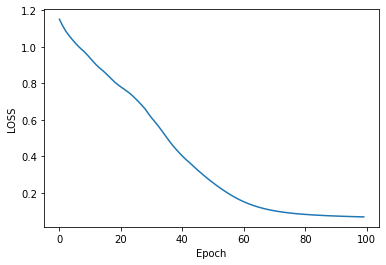

In [30]:
plt.plot(range(100),losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')
plt.show()

In [31]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [32]:
loss

tensor(0.0581)

# Prediction

In [52]:
correct = 0

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}.) {str(y_val)} {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'We got {correct} correct.')

1.) tensor([-2.1252,  4.8064, -0.8628]) 1
2.) tensor([-1.7985,  5.3098, -1.5449]) 1
3.) tensor([  6.3542,   0.8438, -10.0541]) 0
4.) tensor([-3.9123,  4.5958,  1.1693]) 1
5.) tensor([-7.4713,  3.2021,  5.7853]) 2
6.) tensor([-10.4976,   1.6459,   9.6297]) 2
7.) tensor([  6.3201,   0.9917, -10.1532]) 0
8.) tensor([  7.0468,   0.7059, -10.9137]) 0
9.) tensor([-7.2061,  3.3477,  5.3565]) 2
10.) tensor([-9.3960,  2.5759,  8.1033]) 2
11.) tensor([-9.8808,  2.3475,  8.7141]) 2
12.) tensor([ 6.2748,  0.6655, -9.7613]) 0
13.) tensor([-9.3142,  2.1880,  8.1947]) 2
14.) tensor([-3.7803,  4.5050,  1.0752]) 1
15.) tensor([-7.8657,  3.0117,  6.2303]) 2
16.) tensor([-1.8867,  5.1572, -1.3345]) 1
17.) tensor([-5.7006,  3.5030,  3.6696]) 2
18.) tensor([  7.1789,   0.7369, -11.1350]) 0
19.) tensor([-3.2944,  4.7931,  0.3475]) 1
20.) tensor([-7.7665,  3.7629,  5.7095]) 2
21.) tensor([  6.6499,   0.7889, -10.4252]) 0
22.) tensor([  7.4357,   0.8918, -11.6600]) 0
23.) tensor([-9.7584,  2.1744,  8.6654]) 2

# Saving the model

In [54]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [55]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [57]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [58]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [60]:
with torch.no_grad():
    print(new_model(mystery_iris))

tensor([  5.9522,   1.5596, -10.0054])
